# Assignment 2 - Question 4
The objective of this assignment is to get you familiarize with  the  problem  of  `Linear Regression`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Q4.ipynb`.
- Fill the Name and Roll number in the below markdown

Name: Siddik Ayyappa <br>
Roll Number: 2020101089

## Background about the dataset

TLDR: You have 4 independent variables (`float`) for each molecule. You can use a linear combination of these 4 independent variables to predict the bandgap (dependent variable) of each molecule.

You can read more about the problem in [Li et al, Bandgap tuning strategy by cations and halide ions of lead halide perovskites learned from machine learning, RSC Adv., 2021,11, 15688-15694](https://doi.org/10.1039/D1RA03117A).

In [10]:
import csv
import random
import numpy as np
import pandas as pd # for visualisation
import timeit

In [11]:
all_molecules = list()

with open('bg_data.txt', 'r') as infile:
    input_rows = csv.DictReader(infile)
    
    for row in input_rows:
        current_mol = ([float(row['Cs']), float(row['FA']), float(row['Cl']), float(row['Br'])], float(row['Bandgap']))
        all_molecules.append(current_mol)

random.shuffle(all_molecules)


num_train = int(len(all_molecules) * 0.8)

# each point in x_train has 4 values - 1 for each feature
x_train = np.array([x[0] for x in all_molecules[:num_train]])
# each point in y_train has 1 value - the bandgap of the molecule
y_train = np.array([x[1] for x in all_molecules[:num_train]])

x_test = np.array([x[0] for x in all_molecules[num_train:]])
y_test = np.array([x[1] for x in all_molecules[num_train:]])

### 4.1 Implement a Linear Regression model that minimizes the MSE **without using any libraries**. You may use NumPy to vectorize your code, but *do not use numpy.polyfit* or anything similar.

4.1.1 Explain how you plan to implement Linear Regression in 5-10 lines.

 

<!-- your answer to 1.1.1 -->
We shall first look at the problem we are trying to solve. We have a four dimensional input (```x_train```), which is being mapped to a real number (```y```). We, plan to fit the data as follows. 
 
 $\theta.X + b = y $


 Where the paramter $\theta$, is a 4 dimensional vector and $b$ is  The parameters we aim to predict are $\theta, b$, which will result in the least MSE (Or rather the objective loss function). We shall achieve this with te help of Gradient Descent. <br>
 $\theta^{i+1} = \theta^i - \eta*(\nabla_{\theta}J)$<br>
 $b^{i+1} = b^i - \eta*(\nabla_{b}J)$<br>
 $\hat{y_i} = \theta.X_i + b$<br>
 $J = \frac{1}{M}\sum_{i = 1}^m(y_i - \hat{y_i})^2$<br>

 This is done for multiple number of epochs, and then the parameters are frozen, and tested on. 

4.1.2 Implement Linear Regression using `x_train` and `y_train` as the train dataset.

4.1.2.1 Choose the best learning rate and print the learning rate for which you achieved the best MSE.

In [12]:
class linear_regression():
    def __init__(self, learning_rate):
        self.parameters = None
        self.learning_rate = learning_rate
    def fit(self, x_train, y_train, epochs):
        self.parameters, gradient = np.zeros(x_train[0].shape), np.zeros(x_train[0].shape)
        bias_gradient = 0
        self.bias = 0
        for _ in range(epochs):
            loss = 0
            diff = 0
            for i in range(len(x_train)):
                y_temp = np.dot(self.parameters, x_train[i]) + self.bias
                diff = y_temp - y_train[i]
                loss += diff**2
                gradient += 2*x_train[i]*diff
                bias_gradient += diff
            gradient /= len(x_train)
            bias_gradient  /= len(x_train)
            loss /= len(x_train)
            self.parameters -= self.learning_rate*(gradient)
            self.bias -= self.learning_rate*(bias_gradient)    
    def predict(self, x):
        y_pred = []
        for i in range(len(x)):
            y_pred += [np.dot(self.parameters, x[i]) + self.bias]
        y_pred = np.array(y_pred)
        return y_pred
x = linear_regression(0.3)
start = timeit.default_timer()
x.fit(x_train, y_train, 100)
end = timeit.default_timer()
print("Training Done:\n Time:", end-start, "s")

Training Done:
 Time: 0.0840987409974332 s


In [13]:
print("Mean Square Error: ")
print(sum((x.predict(x_test) - y_test)**2))

Mean Square Error: 
0.08620944847648604


4.1.3 Make a [Parity Plot](https://en.wikipedia.org/wiki/Parity_plot) of your model's bandgap predictions on the test set with the actual values.

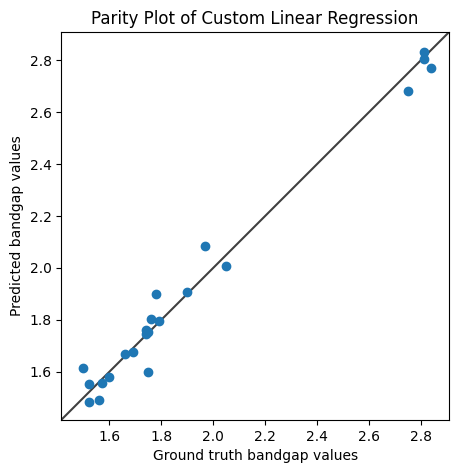

In [14]:
# Get the predictions of x_test into `y_pred`


# ...
#

y_pred = x.predict(x_test)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(5, 10))

ax.scatter(y_test, y_pred)

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

ax.set_title('Parity Plot of Custom Linear Regression')
ax.set_xlabel('Ground truth bandgap values')
ax.set_ylabel('Predicted bandgap values')
plt.show()

### 4.2 Implement Ridge regression
4.2.1 Explain Ridge regression briefly in 1-2 lines.

<!-- Your answer to 1.2.1 -->
Ridge regression does the same thing that Vanilla regression does but with a variation in the loss function. It employs a regularization technique callled as L2 regularization. Regularization is used to create simpler models, and this avoid overfitting and feature selection. 

$J = \frac{1}{M}\sum_{i = 1}^m(y_i - \hat{y_i})^2 + \alpha \sum \theta_i^2$

4.2.2 Implement Ridge regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total. (You can use scikit-learn from this cell onwards)

- The parameter alpha, determines how strongly the regularization is applied.
- Must belong to [0, $\infty$]
- Smaller the value of alpha, smaller the regularization. Zero alpha gives the same results as a vanilla linear regression. (This is evident from the fact that Ridge and Lasso Regression techniques, give the same MSE, with $\alpha = 0$)
- If a sufficiently large value of $\alpha$ would result in the paramters with L2 norm with small coefficients, but not zero. 
- Hence the alpha value must be chose in such a way that the MSE and the L2 Norm are minimized properly.
- Too large of a alpha, would result in a simpler model, but maybe way too simpler that could be underfitting. ($\uparrow$ Bias)
- Too small of a alpha, would result in a complex model, but may have to risk the overfitting. ($\uparrow$ Variance)

In [15]:
# you should not have imported sklearn before this point
import sklearn
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score

alpha_values = [0, 0.001, 0.01, 0.1, 1.0, 10]
mse_dict = []
for alpha in alpha_values:
    ridge_regression = Ridge(alpha = alpha)
    ridge_regression.fit(x_train, y_train)
    ridge_y_pred = ridge_regression.predict(x_test)
    mse_dict += [np.sqrt(sum((ridge_y_pred - y_test)**2))]
    # implement Ridge regression and make a table where you explore the effect of different values of `alpha`


In [16]:
df = pd.DataFrame({"Alpha": alpha_values, "RMSE": mse_dict})
df.set_index("Alpha")
df

,Alpha,RMSE
0,0.000,0.283468
1,0.001,0.283459
2,0.010,0.283398
3,0.100,0.284385
4,1.000,0.384821
5,10.000,1.153260


### 4.3 Implement Lasso regression
4.3.1 Explain Lasso regression briefly in 1-2 lines.

Lasso Regularization, just like Ridge regression, is a variant of the vanilla linear regression, which uses regularization techniques to produce simpler models, to address overfitting and feature selection. Instead of L2 regularization, like Ridge Regression, Lasso Regression uses L1 regularization technique. 

$J \frac{1}{M}\sum_{i = 1}^m(y_i - \hat{y_i})^2 + \alpha\sum \vert \theta_i \vert$ 

4.3.2 Implement Lasso regression and make a table of different RMSE scores you achieved with different values of alpha. What does the parameter `alpha` do? How does it affect the results here? Explain in 5-10 lines in total.

- The parameter alpha, determines how strongly the regularization is applied.
- Must belong to [0, $\infty$]
- Smaller the value of alpha, smaller the regularization. Zero alpha gives the same results as a vanilla linear regression. (This is evident from the fact that Ridge and Lasso Regression techniques, give the same MSE, with $\alpha = 0$)
- If a sufficiently large value of $\alpha$ would result in the paramters with L2 norm with small coefficients, tend to make them zero. 
- Hence the alpha value must be chose in such a way that the MSE and the L2 Norm are minimized properly.
- Too large of a alpha, would result in a simpler model, but maybe way too simpler that could be underfitting. ($\uparrow$ Bias)
- Too small of a alpha, would result in a complex model, but may have to risk the overfitting. ($\uparrow$ Variance)

In [17]:
# implement Lasso regression and make a table where you explore the effect of different values of `alpha`
from sklearn.linear_model import Lasso

alpha_values = [0, 0.001, 0.01, 0.1, 1.0, 10]
mse_dict = []
for alpha in alpha_values:
    lasso_regression = Lasso(alpha = alpha)
    lasso_regression.fit(x_train, y_train)
    ridge_y_pred = lasso_regression.predict(x_test)
    mse_dict += [np.sqrt(sum((ridge_y_pred - y_test)**2))]

/var/folders/13/_wyhp36n6jgdfcwhj2x6mm940000gn/T/ipykernel_28715/3429651262.py:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_regression.fit(x_train, y_train)
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.623e-01, tolerance: 1.784e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coord

In [18]:
df = pd.DataFrame({"Alpha": alpha_values, "RMSE": mse_dict})
df.set_index("Alpha")
df

,Alpha,RMSE
0,0.000,0.283468
1,0.001,0.282557
2,0.010,0.368660
3,0.100,2.048338
4,1.000,2.085298
5,10.000,2.085298
